In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import sys
import math
import numpy as np
import collections

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

sys.path.append('../')
from higgs_inference import settings
from higgs_inference.various.utils import s_from_r, find_binning


In [4]:
y = np.load('../data/unweighted_events/y_illustration.npy')
t = np.load('../data/unweighted_events/scores_illustration.npy')
r = np.load('../data/unweighted_events/r_illustration.npy')

t_hat = np.load('../results/score_regression/that_illustration_scoreregression_deep.npy')
r_hat_scoretheta = np.load('../results/score_regression/r_illustration_scoreregression_scoretheta_deep.npy')
r_hat_fixed = np.load('../results/score_regression/r_illustration_scoreregression_score_deep.npy')
r_hat_dynamic = np.load('../results/score_regression/r_illustration_scoreregression_rotatedscore_deep.npy')


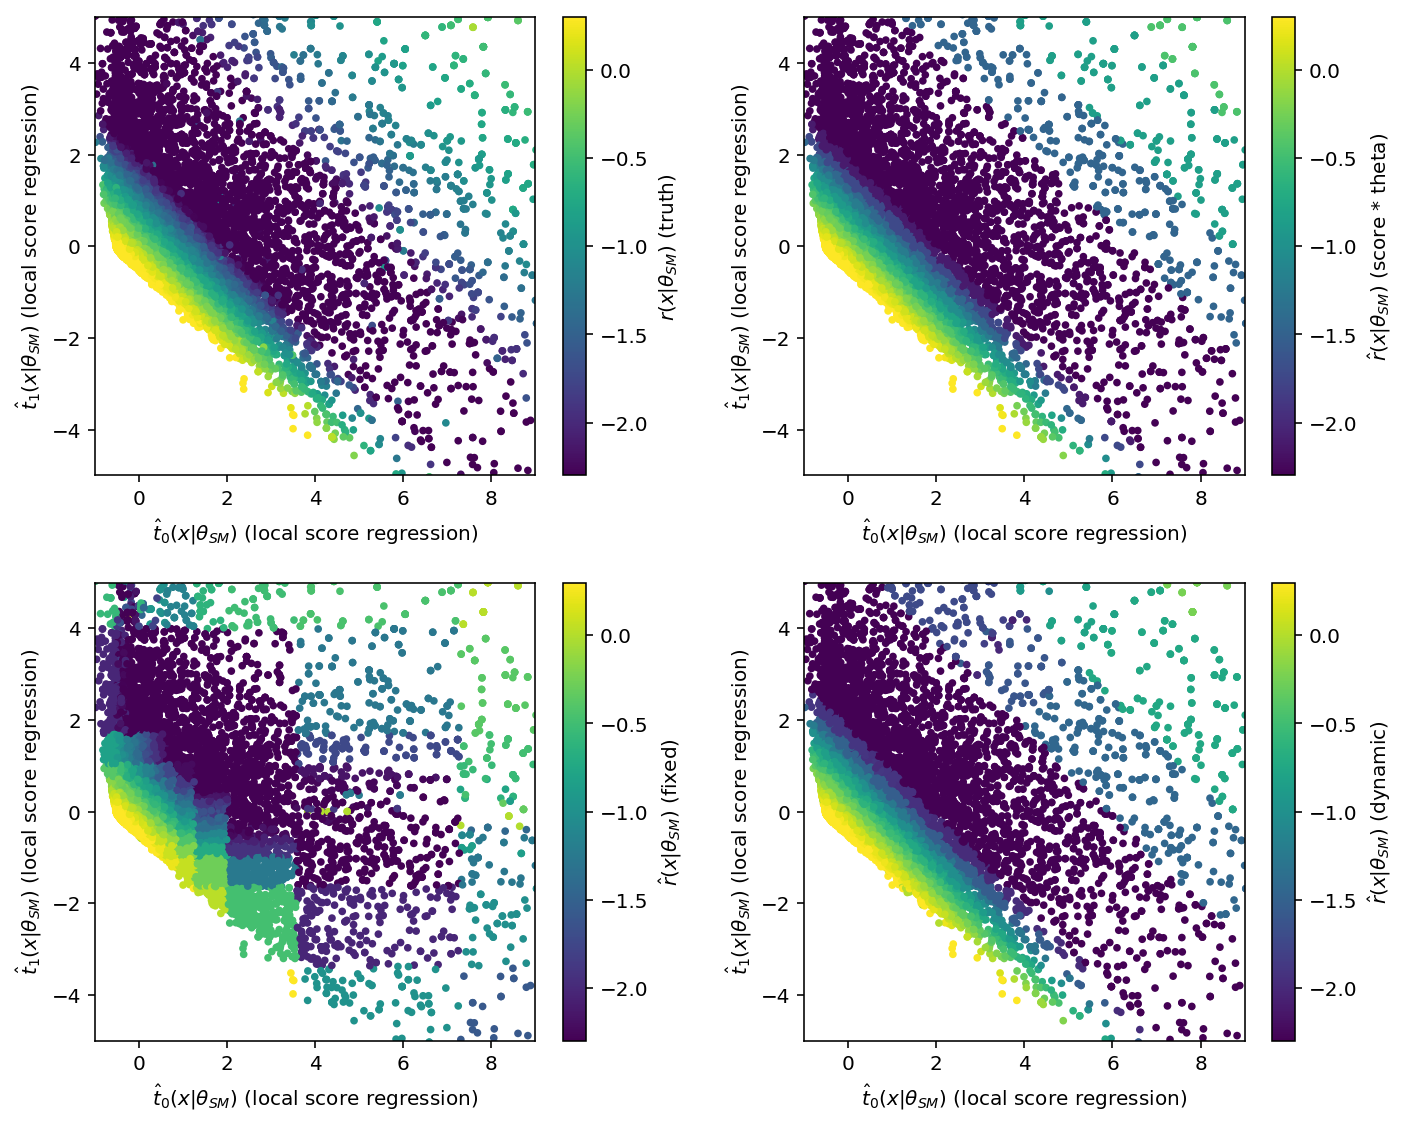

In [5]:
plt.figure(figsize=(10.,8.))

skip = 2
rmin, rmax = -2.3,0.3



ax = plt.subplot(2,2,1)

plt.scatter(t_hat[::skip,0], t_hat[::skip,1], c=np.log(r)[::skip], cmap='viridis', vmin=rmin, vmax=rmax, s=8.)
cbar = plt.colorbar()

plt.xlabel(r'$\hat{t}_0 (x | \theta_{SM})$ (local score regression)')
plt.ylabel(r'$\hat{t}_1 (x | \theta_{SM})$ (local score regression)')
cbar.set_label(r'$r(x | \theta_{SM})$ (truth)')
plt.xlim(-1.,9.)
plt.ylim(-5,5)



ax = plt.subplot(2,2,2)

plt.scatter(t_hat[::skip,0], t_hat[::skip,1], c=np.log(r_hat_scoretheta)[::skip], cmap='viridis', vmin=rmin, vmax=rmax, s=8.)
cbar = plt.colorbar()

plt.xlabel(r'$\hat{t}_0 (x | \theta_{SM})$ (local score regression)')
plt.ylabel(r'$\hat{t}_1 (x | \theta_{SM})$ (local score regression)')
cbar.set_label(r'$\hat{r}(x | \theta_{SM})$ (score * theta)')
plt.xlim(-1.,9.)
plt.ylim(-5,5)



ax = plt.subplot(2,2,3)

plt.scatter(t_hat[::skip,0], t_hat[::skip,1], c=np.log(r_hat_fixed)[::skip], cmap='viridis', vmin=rmin, vmax=rmax, s=8.)
cbar = plt.colorbar()

plt.xlabel(r'$\hat{t}_0 (x | \theta_{SM})$ (local score regression)')
plt.ylabel(r'$\hat{t}_1 (x | \theta_{SM})$ (local score regression)')
cbar.set_label(r'$\hat{r}(x | \theta_{SM})$ (fixed)')
plt.xlim(-1.,9.)
plt.ylim(-5,5)



ax = plt.subplot(2,2,4)

plt.scatter(t_hat[::skip,0], t_hat[::skip,1], c=np.log(r_hat_dynamic)[::skip], cmap='viridis', vmin=rmin, vmax=rmax, s=8.)
cbar = plt.colorbar()

plt.xlabel(r'$\hat{t}_0 (x | \theta_{SM})$ (local score regression)')
plt.ylabel(r'$\hat{t}_1 (x | \theta_{SM})$ (local score regression)')
cbar.set_label(r'$\hat{r}(x | \theta_{SM})$ (dynamic)')
plt.xlim(-1.,9.)
plt.ylim(-5,5)


plt.tight_layout()
plt.show()


In [47]:
edges = find_binning(t[:,0], [9,10,9], min_bin_size=0.1)

In [48]:
for i, (e1, e2) in enumerate(zip(edges[:-1], edges[1:])):
    print(i, round(e1,2), round(e2,2), round(e2-e1,2))

0 -100000.0 -0.54 99999.46
1 -0.54 -0.49 0.05
2 -0.49 -0.19 0.29
3 -0.19 0.1 0.29
4 0.1 0.39 0.29
5 0.39 0.69 0.29
6 0.69 0.98 0.29
7 0.98 1.27 0.29
8 1.27 1.57 0.29
9 1.57 1.86 0.29
10 1.86 2.15 0.29
11 2.15 2.45 0.29
12 2.45 3.65 1.2
13 3.65 4.84 1.2
14 4.84 6.04 1.2
15 6.04 7.24 1.2
16 7.24 8.44 1.2
17 8.44 9.64 1.2
18 9.64 10.84 1.2
19 10.84 12.03 1.2
20 12.03 13.23 1.2
21 13.23 14.43 1.2
22 14.43 15.63 1.2
23 15.63 16.83 1.2
24 16.83 18.03 1.2
25 18.03 19.23 1.2
26 19.23 20.42 1.2
27 20.42 21.62 1.2
28 21.62 22.82 1.2
29 22.82 100000.0 99977.18
